In [1]:
import pandas as pd

df = pd.read_csv("filtered_data(1).csv")
print(df.columns.tolist())

['Capitaline Code', 'Company Name', 'Sector', 'Industry', 'Financial Year End', 'NSE Symbol', 'BSE Code', 'Listing Status(MCX)', 'Year', 'Net Working Capital ( Incl. Def. Tax)', 'Debt-Equity Ratio', 'Long Term Debt-Equity Ratio', 'Current Ratio', 'Interest Cover Ratio', 'ROCE (%)', 'PBIDTM (%)', 'PBITM (%)', 'APATM (%)', 'RONW (%)', 'ROE (X)', 'EPS (annualised) (Unit Curr)', 'Net Sales', 'Gross Sales', 'Value Of Output', 'Price to Book Value ( P/BV)', 'Price Earning (P/E)', 'EV/EBIDTA', 'Market Cap/Sales', 'Book Value', 'Cash Flow From Operating Activities', 'Total Income', 'Gross Profit']


<ipython-input-1-26f7fecdaff6>:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("filtered_data(1).csv")


In [7]:
import pandas as pd

# Load your dataset
df = pd.read_csv("filtered_data(1).csv")

# Define thresholds
thresholds = {
    "Debt-Equity Ratio": 1.0,
    "Long Term Debt-Equity Ratio": 0.5,
    "Current Ratio": 1.5,
    "Interest Cover Ratio": 3.0,
    "ROCE (%)": 12.0,
    "PBIDTM (%)": 10.0,
    "RONW (%)": 15.0,
    "ROE (X)": 0.15,  # 15%
    "Price to Book Value ( P/BV)": 3.0,
    "Price Earning (P/E)": 25.0,
    "EV/EBIDTA": 10.0,
    "Market Cap/Sales": 2.0,
    "Net Working Capital ( Incl. Def. Tax)": 0.0,
    "Gross Profit": 0.0
}

# Define updated weights based on priority
weights = {
    "ROCE (%)": 0.10,
    "PBIDTM (%)": 0.09,
    "RONW (%)": 0.09,
    "ROE (X)": 0.08,
    "Current Ratio": 0.09,
    "Net Working Capital ( Incl. Def. Tax)": 0.09,
    "Debt-Equity Ratio": 0.06,
    "Long Term Debt-Equity Ratio": 0.06,
    "Interest Cover Ratio": 0.06,
    "Price to Book Value ( P/BV)": 0.06,
    "Price Earning (P/E)": 0.06,
    "EV/EBIDTA": 0.06,
    "Market Cap/Sales": 0.06,
    "Gross Profit": 0.04
}

# Ensure all relevant columns are present
available_cols = [col for col in thresholds if col in df.columns]
binary_scores = pd.DataFrame(index=df.index)

# Create binary scoring based on threshold
for col in available_cols:
    if col in ["Debt-Equity Ratio", "Long Term Debt-Equity Ratio"]:
        # For these ratios, lower is better
        binary_scores[col] = (df[col] <= thresholds[col]).astype(int)
    else:
        binary_scores[col] = (df[col] >= thresholds[col]).astype(int)

# Multiply each score with its weight
for col in available_cols:
    binary_scores[col] = binary_scores[col] * weights[col]

# Compute weighted score and assign label
df["Weighted Score"] = binary_scores.sum(axis=1)
threshold_score = df["Weighted Score"].quantile(0.4)
df["Performance Label"] = (df["Weighted Score"] > threshold_score).astype(int)

# Preview result
df[["Company Name", "Weighted Score", "Performance Label"]].head(10)
df.head()

<ipython-input-7-1d83758262d8>:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("filtered_data(1).csv")


,Capitaline Code,Company Name,Sector,Industry,Financial Year End,NSE Symbol,BSE Code,Listing Status(MCX),Year,Net Working Capital ( Incl. Def. Tax),...,Price to Book Value ( P/BV),Price Earning (P/E),EV/EBIDTA,Market Cap/Sales,Book Value,Cash Flow From Operating Activities,Total Income,Gross Profit,Weighted Score,Performance Label
0,23450,20 Microns,Mining & Mineral products,Mining / Minerals,3.0,20MICRONS,533022.0,Active,2010,52.65,...,1.33,7.86,5.80,0.31,29.03,3.29,180.87,14.95,0.49,1
1,23450,20 Microns,Mining & Mineral products,Mining / Minerals,3.0,20MICRONS,533022.0,Active,2014,54.40,...,1.43,783.75,8.21,0.35,22.00,23.12,304.27,10.16,0.28,0
2,23450,20 Microns,Mining & Mineral products,Mining / Minerals,3.0,20MICRONS,533022.0,Active,2020,73.54,...,0.52,3.63,2.96,0.19,49.14,40.26,496.78,46.33,0.61,1
3,23450,20 Microns,Mining & Mineral products,Mining / Minerals,3.0,20MICRONS,533022.0,Active,2015,51.14,...,1.75,0.00,8.67,0.37,20.60,24.45,321.79,4.82,0.13,0
4,23450,20 Microns,Mining & Mineral products,Mining / Minerals,3.0,20MICRONS,533022.0,Active,2018,55.06,...,1.30,10.86,5.44,0.44,37.63,49.86,389.44,32.90,0.38,1


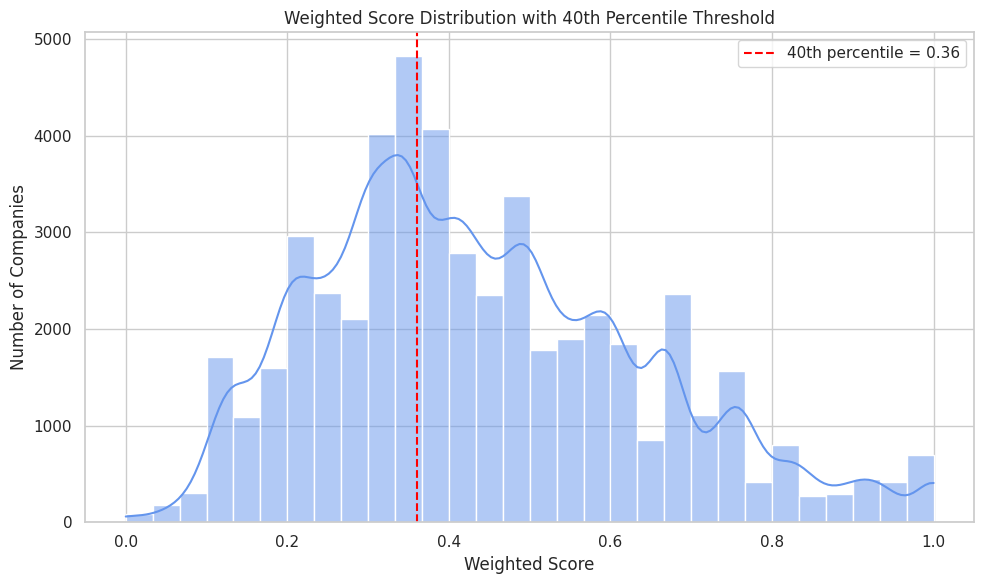

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df["Weighted Score"], bins=30, kde=True, color='cornflowerblue')

plt.axvline(threshold_score, color='red', linestyle='--', label=f'40th percentile = {threshold_score:.2f}')
plt.title("Weighted Score Distribution with 40th Percentile Threshold")
plt.xlabel("Weighted Score")
plt.ylabel("Number of Companies")
plt.legend()
plt.tight_layout()
plt.show()


<ipython-input-10-95b7103a85a8>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Performance Label", palette={"0": "salmon", "1": "mediumseagreen"})


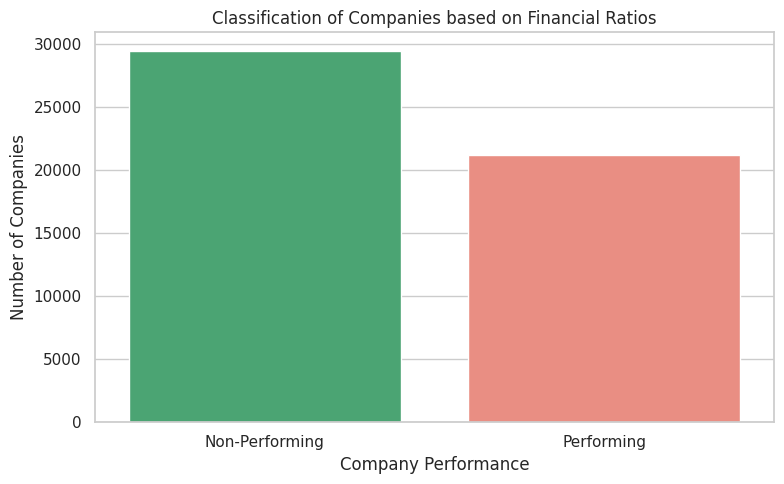

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Convert column to string (if needed)
df["Performance Label"] = df["Performance Label"].astype(str)

# Countplot with corrected palette
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Performance Label", palette={"0": "salmon", "1": "mediumseagreen"})

# Set labels and title
plt.xticks([0, 1], ['Non-Performing', 'Performing'])
plt.xlabel("Company Performance")
plt.ylabel("Number of Companies")
plt.title("Classification of Companies based on Financial Ratios")

plt.tight_layout()
plt.show()


In [11]:
df.to_csv("classified_companies.csv",index=False)